# Series de tiempo con Python

*Esta notebook fue creada originalmente como un blog post por [Raúl E. López Briega](http://relopezbriega.com.ar/) en [Matemáticas, análisis de datos y python](http://relopezbriega.github.io). El contenido esta bajo la licencia BSD.*

<img alt="Series de tiempo con Python" title="Series de tiempo con Python" src="http://relopezbriega.github.io/images/timeSeries.png" high=400px width=600px>

## Introducción

Los datos obtenidos a partir de observaciones recogidas a lo largo del tiempo son extremadamente comunes. En los negocios, observamos las tasas de interés de la semana, los precios de cierre de las acciones diarios, los índices de precios mensuales, las cifras de ventas anuales, y así sucesivamente. En meteorología, observamos las temperaturas máximas y mínimas diarias, los índices anuales de precipitación y de sequía, y las velocidades del viento por hora. En la agricultura, registramos las cifras anuales de producción agrícola y ganadera, la erosión del suelo, y las ventas de exportación. En las ciencias biológicas, observamos la actividad eléctrica del corazón en intervalos de milisegundos. La lista de las áreas en las que se estudian las [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal) es prácticamente interminable.

## ¿Qué es una serie de tiempo?

Una [serie de tiempo](https://es.wikipedia.org/wiki/Serie_temporal) o [serie temporal](https://es.wikipedia.org/wiki/Serie_temporal) es una secuencia de datos, observaciones o valores, medidos en determinados momentos y ordenados cronológicamente. Los datos pueden estar espaciados a intervalos iguales o desiguales. Una vez que se captura una [serie de tiempo](https://es.wikipedia.org/wiki/Serie_temporal), a menudo se realiza un análisis sobre ella para identificar patrones en los datos, en esencia, lo que se busca es entender que suceda a medida que el tiempo va avanzando. Ser capaz de procesar datos de [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal) es una habilidad esencial en el mundo moderno. Uno de los usos más habituales de las [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal) es su análisis para predicción y pronóstico (así se hace por ejemplo con los datos climáticos, las acciones de bolsa, o las series de datos demográficos). Resulta difícil imaginar una rama de las ciencias en la que no aparezcan datos que puedan ser considerados como [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal). 

### ¿Qué las hace especiales?

Las características que hacen a las [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal) especiales y las diferencia de, por ejemplo, un problema de [regresión](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_la_regresi%C3%B3n) son las siguientes:

1. Son ***dependientes del tiempo***; por lo tanto el supuesto básico de los modelos de [regresión](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_la_regresi%C3%B3n) de que las observaciones son *independientes* no se sostiene en este caso.

2. Suelen tener una ***tendencia***; la mayoría de las [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal) suelen tener algún tipo de tendencia de estacionalidad, es decir, las variaciones propias de un período de tiempo determinado.

3. Suelen estar ***autocorrelacionadas***; la mayoría de los procesos físicos presentan una inercia y no cambian tan rápidamente. Esto, combinado con la frecuencia del muestreo, a menudo hace que las observaciones consecutivas estén [correlacionadas](https://es.wikipedia.org/wiki/Correlaci%C3%B3n). Esta [correlación](https://es.wikipedia.org/wiki/Correlaci%C3%B3n) entre observaciones consecutivas se llama *[autocorrelación](https://es.wikipedia.org/wiki/Autocorrelaci%C3%B3n)*. Cuando los datos están *[autocorrelacionados](https://es.wikipedia.org/wiki/Autocorrelaci%C3%B3n)*, la mayoría de los métodos estadísticos estándares basados en la suposición de observaciones independientes pueden arrojar resultados engañosos o incluso ser inútiles.

## Series de tiempo estacionarias

Un tipo muy importante de [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal) son las [series de tiempo estacionarias](https://es.wikipedia.org/wiki/Proceso_estacionario). Una [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal) se dice que es estrictamente [estacionaria](https://es.wikipedia.org/wiki/Proceso_estacionario) si sus propiedades no son afectadas por los cambios a lo largo del tiempo. Es decir, que se deberían cumplir tres criterios básicos para poder considerar a una [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal) como [estacionaria](https://es.wikipedia.org/wiki/Proceso_estacionario):

1. **La [media](https://es.wikipedia.org/wiki/Media_aritm%C3%A9tica) de la [serie](https://es.wikipedia.org/wiki/Serie_temporal) no debe ser una función de tiempo**; sino que debe ser constante. La siguiente imagen muestra una [serie](https://es.wikipedia.org/wiki/Serie_temporal) que cumple con esta condición y otra que no la cumple.
<img alt="Series de tiempo con Python" title="media estacionaria - no estacionaria" src="http://relopezbriega.github.io/images/Mean_stationary.png" high=300px width=500px>
2. **La [varianza](https://es.wikipedia.org/wiki/Varianza) de la [serie](https://es.wikipedia.org/wiki/Serie_temporal) no debe ser una función del tiempo**. El siguiente gráfico representa una [serie](https://es.wikipedia.org/wiki/Serie_temporal) cuya [varianza](https://es.wikipedia.org/wiki/Varianza) no esta afectada por el tiempo (es [estacionaria](https://es.wikipedia.org/wiki/Proceso_estacionario)) y otra que no cumple con esa condición.
<img alt="Series de tiempo con Python" title="media estacionaria - no estacionaria" src="http://relopezbriega.github.io/images/Var_stationary.png" high=300px width=500px>
3. **La [covarianza](https://es.wikipedia.org/wiki/Covarianza) de la [serie](https://es.wikipedia.org/wiki/Serie_temporal) no debe ser una función del tiempo**. En el gráfico de la derecha, se puede observar que la propagación de la [serie](https://es.wikipedia.org/wiki/Serie_temporal) se va encogiendo a medida que aumenta el tiempo. Por lo tanto, la [covarianza](https://es.wikipedia.org/wiki/Covarianza) no es constante en el tiempo para la *serie roja*.
<img alt="Series de tiempo con Python" title="media estacionaria - no estacionaria" src="http://relopezbriega.github.io/images/Cov_stationary.png" high=300px width=500px>

### ¿Por qué son importantes las series de tiempo estacionarias?

La razón por la que estas [series](https://es.wikipedia.org/wiki/Proceso_estacionario) son importantes es que la mayoría de los modelos de [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal) funcionan bajo el supuesto de que la serie es [estacionaria](https://es.wikipedia.org/wiki/Proceso_estacionario). Intuitivamente, podemos suponer que si una [serie](https://es.wikipedia.org/wiki/Serie_temporal) tiene un comportamiento particular en el tiempo, hay una [probabilidad](http://relopezbriega.github.io/blog/2015/06/27/probabilidad-y-estadistica-con-python/) muy alta de que se comportamiento continúe en el futuro. Además, las teorías relacionadas con las [series estacionarias](https://es.wikipedia.org/wiki/Proceso_estacionario) son más maduras y más fáciles de implementar en comparación con series no estacionarias. A pesar de que el supuesto de que la [serie](https://es.wikipedia.org/wiki/Serie_temporal) es [estacionaria](https://es.wikipedia.org/wiki/Proceso_estacionario) se utiliza en muchos modelos, casi ninguna de las [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal) que encontramos en la práctica son [estacionarias](https://es.wikipedia.org/wiki/Proceso_estacionario). Por tal motivo la [estadística](http://relopezbriega.github.io/blog/2015/06/27/probabilidad-y-estadistica-con-python/) tuvo que desarrollar varias técnicas para hacer [estacionaria](https://es.wikipedia.org/wiki/Proceso_estacionario), o lo más cercano posible a [estacionaria](https://es.wikipedia.org/wiki/Proceso_estacionario), a una [serie](https://es.wikipedia.org/wiki/Serie_temporal).

## Series de tiempo con Python

Las principales librerías que nos ofrece [Python](http://python.org/) para trabajar con [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal) son:

* **[Statsmodels](http://statsmodels.sourceforge.net/stable/tsa.html)**: Esta librería contiene muchos objetos y funciones de suma utilidad para el análisis de [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal). Algunos de los modelos que están cubiertos por [Statsmodels](http://statsmodels.sourceforge.net/stable/tsa.html) incluyen: el [modelo autorregresivo](https://es.wikipedia.org/wiki/Modelo_autorregresivo) (AR); el [modelo autorregresivo de vectores](https://en.wikipedia.org/wiki/Vector_autoregression) (VAR); y el [modelo autorregresivo de media móvil](https://es.wikipedia.org/wiki/Modelo_autorregresivo_de_media_m%C3%B3vil) (ARMA).  También incluye funciones de [estadística descriptiva](http://relopezbriega.github.io/blog/2015/06/27/probabilidad-y-estadistica-con-python/) de [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal), como por ejemplo la *[autocorrelación](https://es.wikipedia.org/wiki/Autocorrelaci%C3%B3n)*, así como las correspondientes propiedades teóricas de [ARMA](https://es.wikipedia.org/wiki/Modelo_autorregresivo_de_media_m%C3%B3vil) o procesos relacionados. Por último, también ofrece las pruebas estadísticas relacionadas y algunas funciones auxiliares muy útiles.


* **[Pandas](http://pandas.pydata.org/)**: [Pandas](http://pandas.pydata.org/) proporciona un amplio soporte para trabajar con datos de [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal). Generalmente cuando trabajamos con [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal) realizamos un amplio abanico de tareas, como: convertir fechas, estandarizar el tiempo de acuerdo a la zona horaria, crear secuencias a determinados intervalos o frecuencias, identificar datos faltantes, desplazar las fechas hacia atrás o hacia adelante por un determinado valor, calcular resúmenes agregados de valores a medida que el tiempo cambia, etc. [Pandas](http://pandas.pydata.org/) nos brinda las herramientas para poder realizar estas y muchas otras tareas en forma muy sencilla.

Veamos algunos ejemplos de como podemos manipular y analizar [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal) con la ayuda de [Python](http://python.org/). En este caso, vamos a jugar un poco con la información de los precios de las acciones de [Weatherford](https://www.weatherford.com/en/homepage) ([WFT](https://finance.yahoo.com/quote/wft?ltr=1)) de este año.

### Manipulando la serie de tiempo con pandas

In [1]:
# <!-- collapse=True -->
# importando modulos necesarios
import numpy as np
import pandas as pd
import pandas.io.data as web
import datetime as dt
from pydataset import data
import statsmodels.api as sm 

# librerías de visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt 


# graficos incrustados
%matplotlib inline

# pandas solo 4 decimales
pd.set_option('precision', 4)

In [2]:
# Ejemplo serie de tiempo con Pandas
# Creando una serie de tiempo de las acciones de WFT desde yahoo finance
wft = web.DataReader("WFT", 'yahoo', '2016-1-1', '2016-9-30')
wft.head(5)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,8.40,8.70,8.29,8.64,10719400,8.64
2016-01-05,8.67,8.80,8.13,8.26,9109100,8.26
2016-01-06,7.94,8.16,7.84,7.91,13203200,7.91
2016-01-07,7.69,7.83,7.34,7.34,12633800,7.34
2016-01-08,7.48,7.55,6.86,6.97,18547500,6.97


In [3]:
# filtrando sólo del 2016-02-04 al 2016-02-18
wft['2016-02-04':'2016-02-18']

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-02-04,7.10,7.82,6.99,7.39,34474500,7.39
2016-02-05,7.37,7.52,6.87,6.94,27775700,6.94
2016-02-08,6.68,6.79,6.41,6.74,17611300,6.74
2016-02-09,6.60,6.72,6.07,6.34,13741100,6.34
2016-02-10,6.28,6.59,6.11,6.24,8623900,6.24
2016-02-11,6.02,6.27,5.74,6.06,17133900,6.06
2016-02-12,6.14,6.66,6.06,6.47,13498600,6.47
2016-02-16,6.66,6.74,6.33,6.62,11453500,6.62
2016-02-17,6.70,7.13,6.55,6.72,29061300,6.72


In [4]:
# valores al 2016-02-16
wft.loc['2016-2-16']

Open         6.6600e+00
High         6.7400e+00
Low          6.3300e+00
Close        6.6200e+00
Volume       1.1454e+07
Adj Close    6.6200e+00
Name: 2016-02-16 00:00:00, dtype: float64

In [5]:
# valor de la columna Adj Close al 2016-2-16
wft['Adj Close']['2016-2-16']

6.6200000000000001

In [6]:
# filtrando todo febrero de 2016
wft['2016-2']

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-02-01,6.51,6.67,5.90,6.33,36665900,6.33
2016-02-02,6.12,6.16,5.82,5.97,21091100,5.97
2016-02-03,6.04,6.40,5.60,6.27,24870400,6.27
2016-02-04,7.10,7.82,6.99,7.39,34474500,7.39
2016-02-05,7.37,7.52,6.87,6.94,27775700,6.94
2016-02-08,6.68,6.79,6.41,6.74,17611300,6.74
2016-02-09,6.60,6.72,6.07,6.34,13741100,6.34
2016-02-10,6.28,6.59,6.11,6.24,8623900,6.24
2016-02-11,6.02,6.27,5.74,6.06,17133900,6.06


In [7]:
# Valores al cierre de cada mes.
wft.asfreq('M', method='ffill')

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-31,6.26,6.77,6.20,6.74,17661000,6.74
2016-02-29,6.43,6.62,6.33,6.40,14120300,6.40
2016-03-31,7.62,7.86,7.55,7.78,13224600,7.78
2016-04-30,8.10,8.34,7.88,8.13,21137000,8.13
2016-05-31,5.61,5.74,5.55,5.61,8481400,5.61
2016-06-30,5.50,5.58,5.36,5.55,14896000,5.55
2016-07-31,5.64,5.81,5.59,5.68,19153500,5.68
2016-08-31,5.48,5.59,5.37,5.47,11293500,5.47


In [8]:
# Valores al cierre de cada mes (días laborales).
wft.asfreq('BM')

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-29,6.26,6.77,6.20,6.74,17661000,6.74
2016-02-29,6.43,6.62,6.33,6.40,14120300,6.40
2016-03-31,7.62,7.86,7.55,7.78,13224600,7.78
2016-04-29,8.10,8.34,7.88,8.13,21137000,8.13
2016-05-31,5.61,5.74,5.55,5.61,8481400,5.61
2016-06-30,5.50,5.58,5.36,5.55,14896000,5.55
2016-07-29,5.64,5.81,5.59,5.68,19153500,5.68
2016-08-31,5.48,5.59,5.37,5.47,11293500,5.47


In [9]:
# valores al cierre de cada trimestre
wft.asfreq('BQ')

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-03-31,7.62,7.86,7.55,7.78,13224600,7.78
2016-06-30,5.50,5.58,5.36,5.55,14896000,5.55


### Desplazando los valores de la serie

Una operación común en los datos de [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal) es desplazar los valores hacia atrás y adelante en el tiempo, como por ejemplo para calcular el cambio porcentual de una muestra a otra. En [Pandas](http://pandas.pydata.org/) podemos utilizar el método `.shift()`.

In [10]:
# desplazando el 1 dia el valor de cierre
desplazado = wft['Adj Close'].shift(1)
desplazado[:5]

Date
2016-01-04     NaN
2016-01-05    8.64
2016-01-06    8.26
2016-01-07    7.91
2016-01-08    7.34
Name: Adj Close, dtype: float64

In [11]:
# calculando el porcentaje de variación del día.
variacion_diaria = wft['Adj Close'] / wft['Adj Close'].shift(1) - 1
wft['var_diaria'] = variacion_diaria
wft['var_diaria'][:5]

Date
2016-01-04       NaN
2016-01-05   -0.0440
2016-01-06   -0.0424
2016-01-07   -0.0721
2016-01-08   -0.0504
Name: var_diaria, dtype: float64

In [12]:
# mismo resultado utilizando pct_change()
wft['Adj Close'].pct_change()[:5]

Date
2016-01-04       NaN
2016-01-05   -0.0440
2016-01-06   -0.0424
2016-01-07   -0.0721
2016-01-08   -0.0504
Name: Adj Close, dtype: float64

In [13]:
# calculando rendimiento acumulado diario
rendimiento_diario = (1 + wft['Adj Close'].pct_change()).cumprod()
wft['rend_diario'] = rendimiento_diario
wft['rend_diario'][:5]

Date
2016-01-04       NaN
2016-01-05    0.9560
2016-01-06    0.9155
2016-01-07    0.8495
2016-01-08    0.8067
Name: rend_diario, dtype: float64

### Visualizando las series de tiempo

Una operación fundamental para entender el comportamiento de una [serie de tiempo](https://es.wikipedia.org/wiki/Serie_temporal) y poder determinar si se trata de una serie [estacionaria](https://es.wikipedia.org/wiki/Proceso_estacionario) o no; es realizar gráficos de la misma. En [Pandas](http://pandas.pydata.org/) esto lo podemos realizar en forma muy sencilla con el método `.plot()`.

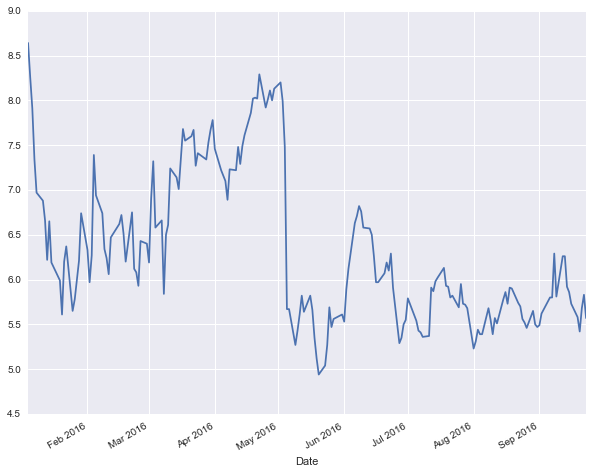

In [14]:
# graficando Adj Close
plot = wft['Adj Close'].plot(figsize=(10, 8))

In [15]:
# Aplicando el filtro Hodrick-Prescott para separar en tendencia y 
# componente ciclico.
wft_ciclo, wft_tend = sm.tsa.filters.hpfilter(wft['Adj Close'])
wft['tend'] = wft_tend

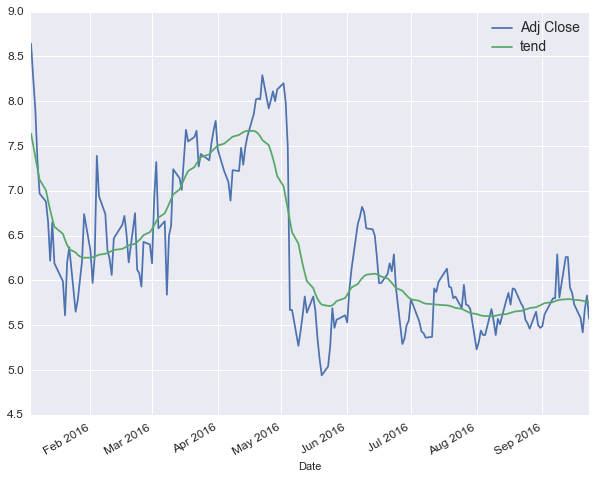

In [16]:
# graficando la variacion del precio real con la tendencia.
wft[['Adj Close', 'tend']].plot(figsize=(10, 8), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);

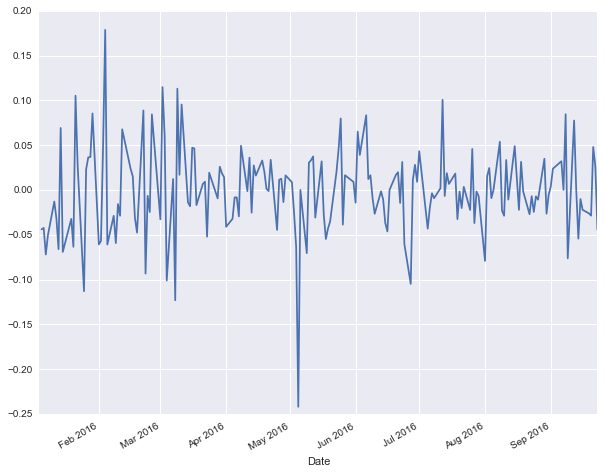

In [17]:
# graficando rendimiento diario
plot = wft['var_diaria'].plot(figsize=(10, 8))

### Promedios móviles y descomposición

[Pandas](http://pandas.pydata.org/) también nos ofrece una serie de funciones para calcular estadísticas móviles, en ellas la función estadística se calcula sobre una ventana de datos representados por un determinado período de tiempo y luego se desplaza la ventana de datos por un intervalo especificado, calculando continuamente la estadística, siempre y cuando la ventana este dentro de las fechas de la [serie de tiempo](https://es.wikipedia.org/wiki/Serie_temporal). El ejemplo más utilizado es el de [media móvil](https://es.wikipedia.org/wiki/Media_m%C3%B3vil), que se usa comúnmente en el análisis de [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal) financieras para suavizar las fluctuaciones a corto plazo y poner de relieve las tendencias a largo plazo en los datos.

Otra técnica interesante que podemos intentar también es la descomposición. Esta es una técnica que trata de descomponer una [serie de tiempo](https://es.wikipedia.org/wiki/Serie_temporal) en su tendencia, su estacionalidad y sus factores residuales. [Statsmodels](http://statsmodels.sourceforge.net/stable/tsa.html) viene con una función de descomposición que nos facilita en sobremanera el trabajo. Veamos unos ejemplos.

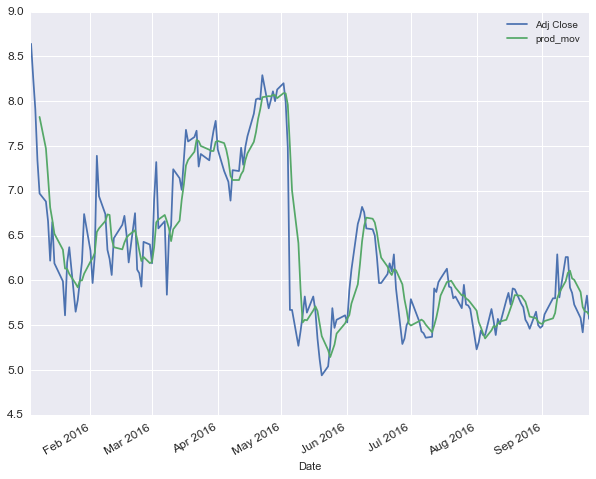

In [18]:
# Calculando promedios móviles cada 5 días
wft_ma = pd.rolling_mean(wft['Adj Close'], 5)
wft['prod_mov'] = wft_ma
plot = wft[['Adj Close', 'prod_mov']].plot(figsize=(10, 8), fontsize=12)

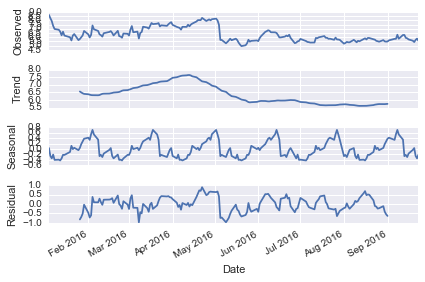

In [19]:
# Ejemplo de descomposición de serie de tiempo
descomposicion = sm.tsa.seasonal_decompose(wft['Adj Close'],
                                                  model='additive', freq=30)  
fig = descomposicion.plot()

### Pronosticando la serie con ARIMA

Como podemos observar en los gráficos que realizamos anteriormente, el comportamiento de la [serie de tiempo](https://es.wikipedia.org/wiki/Serie_temporal) con la que estamos trabajando parece ser totalmente aleatorio y las medidas móviles que calculamos tampoco parecen ser de mucha utilidad para acercar la serie a un comportamiento [estacionario](https://es.wikipedia.org/wiki/Proceso_estacionario). De todas formas podemos intentar aplicar un modelo [ARIMA](https://es.wikipedia.org/wiki/Modelo_autorregresivo_integrado_de_media_m%C3%B3vil) sobre la serie y ver que tan bien nos va con el pronostico del modelo. El modelo [ARIMA](https://es.wikipedia.org/wiki/Modelo_autorregresivo_integrado_de_media_m%C3%B3vil) es similar a una [regresión estadística](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_la_regresi%C3%B3n) pero aplicando los conceptos de las [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal); por tanto, los pronósticos del modelo vienen explicadas por los datos del pasado y no por variables independientes.

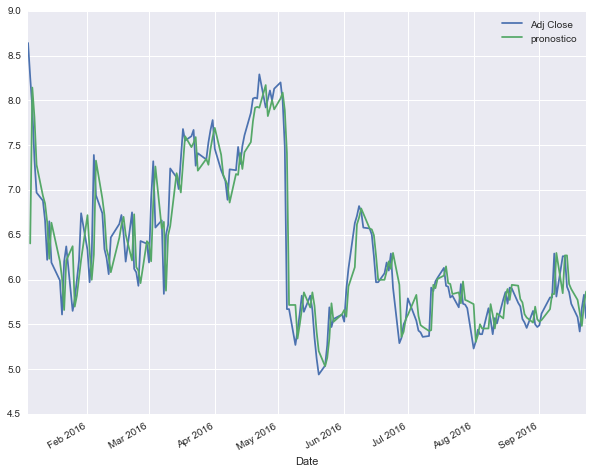

In [20]:
# Modelo ARIMA sobre el valor de cierre de la acción.
modelo = sm.tsa.ARIMA(wft['Adj Close'].iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
wft['pronostico'] = resultados.fittedvalues  
plot = wft[['Adj Close', 'pronostico']].plot(figsize=(10, 8))  

Aquí el modelo parece ser bastante efectivo, las líneas en el gráfico son muy similares. Pero para armar el modelo hemos utilizado el valor de cierre de la acción, y la variación de precio en el día a día es muy pequeña en comparación al precio absoluto. Lo que realmente nos interesa predecir es la variación diaria del precio de la acción, por lo tanto deberíamos armar el modelo utilizando la columna de variación diaria que calculamos previamente.

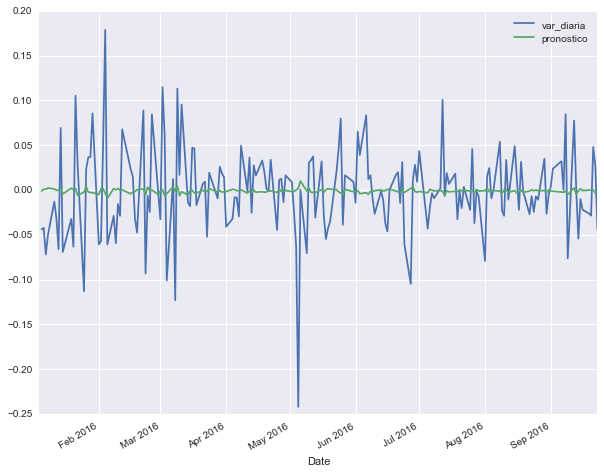

In [21]:
# modelo ARIMA sobre variación diaria
modelo = sm.tsa.ARIMA(wft['var_diaria'].iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
wft['pronostico'] = resultados.fittedvalues  
plot = wft[['var_diaria', 'pronostico']].plot(figsize=(10, 8)) 

En este gráfico podemos ver que es bastante obvio que el pronóstico esta muy lejos. Nuestro modelo predice variaciones muy pequeñas en comparación con lo que ocurre en la realidad del día a día. Este era un resultado esperado ya que solo aplicamos un modelo sencillo de [promedios móviles](https://es.wikipedia.org/wiki/Modelo_autorregresivo_integrado_de_media_m%C3%B3vil) a una serie no [estacionaria](https://es.wikipedia.org/wiki/Proceso_estacionario); después de todo, si fuera tan fácil predecir el movimiento del mercado, todos seríamos millonarios!. No hay suficiente información en los días anteriores para poder predecir con exactitud lo que va a pasar al día siguiente.

Aquí concluye este paseo por el mundo de las [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal); como vimos, [Pandas](http://pandas.pydata.org/) y [Statsmodels](http://statsmodels.sourceforge.net/stable/tsa.html) pueden ser de mucha ayuda para trabajar con ellas. Espero que lo hayan encontrado útil.

Saludos!

*Este post fue escrito utilizando IPython notebook. Pueden descargar este [notebook](https://github.com/relopezbriega/relopezbriega.github.io/blob/master/downloads/TimeSeriePy.ipynb) o ver su version estática en [nbviewer](http://nbviewer.ipython.org/github/relopezbriega/relopezbriega.github.io/blob/master/downloads/TimeSeriePy.ipynb).*